# Table of contents

## 01 Importing libraries

## 02 Importing data

## 03 Checking data
### 03.1 Dropping outliers in column 'prices'

## 04Addressing PII data

## 05 Comparing customer behaviour across regions
### 05.1 Creating a region flag
### 05.2 Comparing spending behaviour in the different regions

## 06 Excluding low-activity customers
### 06.1 Creating low-activity exclusion flag
### 06.2 Exporting dataframes (moved to the end)

## 07 Customer targetting 
### 07.1 Definition of customer profiles
### 07.2 Creation of customer profiles

## 08 Visualising distribution of customer profiles

## 09 Aggregation of minimum, mean and maximum usage frequency and expenditure for customer profiles

## 10 Comparison of customer profiles with regions and departments

## 11 Answering questions for final report and creating more visualisations
### 11.1 Listing columns derived throughout analysis in final report
### 11.2 Re-creating bar chart for busiest day of the week
### 11.3 Re-creating histogram for busiest hour of the day
### 11.4 Re-creating line chart to show when people spend most money
### 11.5 Grouping product orders into price ranges
### 11.6 Visualising popularity of departments (frequency of product orders)
### 11.7 Visualising customer brand loyalty
### 11.8 Checking for differences in ordering habits based on customers' loyalty status
### 11.9 Visualising ordering habits depending on loyalty status
### 11.10 Checking revnue created from price ranges

## 12 Exporting dataframes

# 01 Importing libraries

In [1]:
# Importing pandas, NumPy, os, matplotlib, seaborn and scipy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing data

In [2]:
# Defining path variable
path = r'/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-01-18 Instacart basket analysis'

In [3]:
# Importing merged data on departmends, products, orders and customers as df
df = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared data', '2023-02-18_ords_prods_cust_deps.pkl'))

# 03 Checking data

In [4]:
# Getting basic info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   department_id                  int64  
 1   department                     object 
 2   product_id                     int64  
 3   product_name                   object 
 4   aisle_id                       int64  
 5   prices                         float64
 6   order_id                       int64  
 7   user_id                        int64  
 8   order_number                   int64  
 9   order_day_of_the_week          int64  
 10  order_hour_of_day              int64  
 11  days_since_prior_order         float64
 12  add_to_cart_order              int64  
 13  reordered                      int64  
 14  price_range_loc                object 
 15  Busiest_day                    object 
 16  Busiest_days                   object 
 17  Busiest_period_of_day          object 
 18  

In [5]:
# Getting descriptive statistics about variables in df
df.describe()

,department_id,product_id,aisle_id,prices,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,maximum_orders,average_price_for_user,median_days_since_prior_order,age,n_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,9.919792e+00,2.559866e+04,7.119612e+01,1.198023e+01,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.039267e+01,8.352547e+00,5.895873e-01,3.305217e+01,1.198023e+01,9.613510e+00,4.946527e+01,1.501896e+00,9.943773e+04
std,6.281485e+00,1.408400e+04,3.821139e+01,4.956554e+02,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.917825e+00,7.127071e+00,4.919087e-01,2.515525e+01,8.324227e+01,6.454369e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,4.000000e+00,1.354400e+04,3.100000e+01,4.200000e+00,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,9.000000e+00,2.530200e+04,8.300000e+01,7.400000e+00,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824786e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,1.600000e+01,3.794700e+04,1.070000e+02,1.130000e+01,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254023e+00,1.200000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,2.100000e+01,4.968800e+04,1.340000e+02,9.999900e+04,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


## 03.1 Dropping outliers in column 'prices'
Outliers are prices >=14900. This is known from previous tasks. So far the observations have been kept in the dataset, but for the ensuing analysis, they are removed to avoid distortion of the analysis and recommendations deduced from it.

In [6]:
# Checking dimensions of df
df.shape

(32404859, 32)

In [7]:
# Counting number of outliers
(df['prices'] >=14900).value_counts()

False    32399732
True         5127
Name: prices, dtype: int64

In [8]:
# Dropping outliers
df = df[df['prices'] <14900]

In [9]:
# Checking dimension of df
df.shape

(32399732, 32)

In [10]:
# Checking whether dropping was correct
32404859 - 5127 == 32399732

True

In [11]:
# Changing pandas options to display all columns in a dataframe
pd.options.display.max_columns = None

In [12]:
# Checking top rows of df
df.head(10)

,department_id,department,product_id,product_name,aisle_id,prices,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,maximum_orders,loyalty_flag,average_price_for_user,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,surname,gender,state,age,n_dependants,fam_status,income
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,10.5,2563211,1677,1,5,13,0.0,9,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
1,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2135223,1677,18,4,22,4.0,10,0,Low-range product,Least busy,Least busy two days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
2,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2660694,1677,19,6,13,16.0,15,1,Low-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
3,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,1050238,1677,14,6,0,10.0,16,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
4,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,2149917,1677,16,5,18,11.0,9,1,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
5,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,1903627,1677,17,0,10,9.0,6,1,Mid-range product,Busiest day,Busiest two days,Most orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
6,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,2660694,1677,19,6,13,16.0,9,1,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
7,1,frozen,2935,Classic Onion Pierogies,129,2.3,2563211,1677,1,5,13,0.0,11,0,Low-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
8,1,frozen,2935,Classic Onion Pierogies,129,2.3,2859166,1677,3,5,8,14.0,7,1,Low-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
9,1,frozen,3801,Classic Cheddar Potatoes Pierogie,38,9.2,2660694,1677,19,6,13,16.0,14,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071


# 04 Addressing PII data
first_name and surname are clearly personally identifiable information (PII). Therefore, these columns will be dropped by creating a dataframe df_no_pii.

In [13]:
# Dropping first_name and surname
df_no_pii = df.drop(columns=['first_name', 'surname'])

In [14]:
# Checking df_no_pii
df_no_pii.head()

,department_id,department,product_id,product_name,aisle_id,prices,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,maximum_orders,loyalty_flag,average_price_for_user,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependants,fam_status,income
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,10.5,2563211,1677,1,5,13,0.0,9,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071
1,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2135223,1677,18,4,22,4.0,10,0,Low-range product,Least busy,Least busy two days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071
2,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2660694,1677,19,6,13,16.0,15,1,Low-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071
3,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,1050238,1677,14,6,0,10.0,16,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071
4,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,2149917,1677,16,5,18,11.0,9,1,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071


# 05 Comparing customer behaviour in different geographic areas
Customers will be split into the regions 'Northeast', 'Midwest', 'South', and 'West' (cf. https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States) based on the column 'state'. 

## 05.1 Creating a region flag

In [15]:
# Creating lists
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [16]:
# Defining condition I for Northeast
df_no_pii.loc[df_no_pii['state'].isin(Northeast), 'region_flag'] = 'Northeast'

In [17]:
# Defining condition II for Midwest
df_no_pii.loc[df_no_pii['state'].isin(Midwest), 'region_flag'] = 'Midwest'

In [18]:
# Defining condition III for South
df_no_pii.loc[df_no_pii['state'].isin(South), 'region_flag'] = 'South'

In [19]:
# Defining condition IV for West
df_no_pii.loc[df_no_pii['state'].isin(West), 'region_flag'] = 'West'

In [20]:
# Checking assigned region flags
df_no_pii['region_flag'].value_counts(dropna=False)

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: region_flag, dtype: int64

In [21]:
# Checking df_no_pii with new column region_flag
df_no_pii.head()

,department_id,department,product_id,product_name,aisle_id,prices,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,maximum_orders,loyalty_flag,average_price_for_user,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,region_flag
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,10.5,2563211,1677,1,5,13,0.0,9,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West
1,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2135223,1677,18,4,22,4.0,10,0,Low-range product,Least busy,Least busy two days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West
2,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2660694,1677,19,6,13,16.0,15,1,Low-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West
3,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,1050238,1677,14,6,0,10.0,16,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West
4,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,2149917,1677,16,5,18,11.0,9,1,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West


## 05.2 Comparing spending behaviour in the different regions

In [22]:
# Crossing spending_flag with region_flag
crosstab_spending_region = pd.crosstab(df_no_pii['spending_flag'], df_no_pii['region_flag'], dropna=False)

In [23]:
# Copying crosstab_spending_region to Excel for investigation
crosstab_spending_region.to_clipboard()

In [24]:
# Print crosstab_spending_region
crosstab_spending_region

region_flag,Midwest,Northeast,South,West
spending_flag,,,,
High spender,154715,107381,207902,159120
Low spender,7441350,5614511,10582194,8132559


The percentage of high spenders in is relatively equal across regions (1.89-2.05%). There is no significant difference in customer spending behaviour in the different regions according to the criteria chosen for this analysis.

# 06 Excluding low-activity customers 
The CFO isn't interested in customers with low activity and wants them excluded from the data. Low activity is defined as less than 5 orders. 

## 06.1 Creating low-activity exclusion flag

In [25]:
# Defining condition I for exclusion flag
df_no_pii.loc[df_no_pii['maximum_orders'] <5, 'Low_activity_flag'] = 'Low activity'

In [26]:
# Defining condition II for exclusion flag
df_no_pii.loc[df_no_pii['maximum_orders'] >=5, 'Low_activity_flag'] = 'Regular activity'

In [27]:
# Checking assingment of exclusion flag
df_no_pii['Low_activity_flag'].value_counts(dropna=False)

Regular activity    30959687
Low activity         1440045
Name: Low_activity_flag, dtype: int64

In [28]:
# Creating subset of low-activity observations df_no_pii_low_act
df_no_pii_low_act = df_no_pii.loc[df_no_pii['Low_activity_flag'] == 'Low activity']

In [29]:
# Checking df_no_pii_low_act
df_no_pii_low_act.shape

(1440045, 32)

In [30]:
# Creating subset without low-activity observations df_no_pii_reg_act
df_no_pii_reg_act = df_no_pii.loc[df_no_pii['Low_activity_flag'] != 'Low activity']

In [31]:
# Checking df_no_pii_reg_act
df_no_pii_reg_act.shape

(30959687, 32)

In [32]:
# Double checking lenghts
len(df_no_pii) == len (df_no_pii_low_act) + len(df_no_pii_reg_act)

True

## 06.2 Exporting dataframes
Exporting will be done at the end of the script

# 07 Customer targetting

In [33]:
# Checking relevant descriptive statistics for customer profiles
df_no_pii_reg_act[['age', 'income', 'n_dependants']].describe()

,age,income,n_dependants
count,3.095969e+07,3.095969e+07,3.095969e+07
mean,4.946803e+01,9.965502e+04,1.501815e+00
std,1.848527e+01,4.309143e+04,1.118898e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.728600e+04,1.000000e+00
50%,4.900000e+01,9.676100e+04,2.000000e+00
75%,6.500000e+01,1.280810e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [34]:
# Recalling departments
print(df['department'].unique())

['frozen' 'bakery' 'produce' 'international' 'beverages' 'pets'
 'dry goods pasta' 'personal care' 'meat seafood' 'pantry' 'breakfast'
 'canned goods' 'dairy eggs' 'household' 'babies' 'snacks' 'deli'
 'missing' 'other' 'alcohol' 'bulk']


In [35]:
# Counting observations per department
df_no_pii_reg_act['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [36]:
# Replacing 'missing' with 'other', i.e. merging 'missing' with 'other'
df_no_pii_reg_act['department'].replace({'missing':'other'}, inplace=True)

/var/folders/xf/prw7mx913rn2xzxlywvr1_jc0000gn/T/ipykernel_14482/2280718770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_pii_reg_act['department'].replace({'missing':'other'}, inplace=True)


In [37]:
# Counting observations per department
df_no_pii_reg_act['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
other                99179
pets                 93060
bulk                 33451
Name: department, dtype: int64

## 07.1 Definition of customer profiles
high-income famlily:
n_dependants >1, income >128081

average-income family:
n_dependants >1, income >=67286 & <=128081

low-income family:
n_dependants >1, income <67286

high-income single:
n_dependants ==0, income >128081

average-income single:
n_dependants ==0, income >=67286 & <=128081

low-income single: 
n_dependants ==0, income <67286

high-income elderly:
age >60, income >128081

average-income elderly:
age >60, income >=67286 & <=128081

low-income elderly:
age >60, income <67286

baby-caretaker:
n_dependants >0, department == babies

pet-owner:
income >128081, age >=60, n_dependants ==0, department ==pets

## 07.2 Creation of customer profiles

In [38]:
# Creation of label 'high-income family'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['n_dependants'] > 1) & (df_no_pii_reg_act['income'] > 128081), 'customer_profile'] = 'high-income family'

/var/folders/xf/prw7mx913rn2xzxlywvr1_jc0000gn/T/ipykernel_14482/4151722521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_pii_reg_act.loc[(df_no_pii_reg_act['n_dependants'] > 1) & (df_no_pii_reg_act['income'] > 128081), 'customer_profile'] = 'high-income family'


In [39]:
# Creation of label average-income family
df_no_pii_reg_act.loc[(df_no_pii_reg_act['n_dependants'] > 1) & (df_no_pii_reg_act['income'] >=67286) & (df_no_pii_reg_act['income'] <=128081),'customer_profile'] = 'average-income family'

In [40]:
# Creation of label 'low-income family'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['n_dependants'] > 1) & (df_no_pii_reg_act['income'] < 67286), 'customer_profile'] = 'low-income family'

In [41]:
# Creation of label 'high-income single'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['n_dependants'] ==0) & (df_no_pii_reg_act['income'] >128081), 'customer_profile'] = 'high-income single'

In [42]:
# Creation of label 'average-income single'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['n_dependants'] ==0) & (df_no_pii_reg_act['income'] >=67286) & (df_no_pii_reg_act['income'] <=128081), 'customer_profile'] = 'average-income single'

In [43]:
# Creation of label 'low-income single'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['n_dependants'] ==0) & (df_no_pii_reg_act['income'] <67286), 'customer_profile'] = 'low-income single'

In [44]:
# Creation of label 'high-income elderly'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['age'] >60) & (df_no_pii_reg_act['income'] >128081), 'customer_profile'] = 'high-income elderly'

In [45]:
# Creation of label 'average-income elderly'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['age'] >60) & (df_no_pii_reg_act['income'] >=67286) & (df_no_pii_reg_act['income'] <=128081), 'customer_profile'] = 'average-income elderly'

In [46]:
# Creation of label 'low-income elderly'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['age'] >60) & (df_no_pii_reg_act['income'] <67286), 'customer_profile'] = 'low-income elderly'

In [47]:
# Creation of label 'baby-caretaker'
df_no_pii_reg_act.loc[(df_no_pii_reg_act['n_dependants'] > 0) & (df_no_pii_reg_act['department'] == 'babies'), 'customer_profile'] = 'baby-caretaker'

In [48]:
# Creation of label 'pet-owner'
df_no_pii_reg_act.loc[df_no_pii_reg_act['department'] =='pets', 'customer_profile'] = 'pet-owner'

In [49]:
# Creation of label 'other' for un-labelled observations
df_no_pii_reg_act['customer_profile'] = df_no_pii_reg_act['customer_profile'].fillna('other')

/var/folders/xf/prw7mx913rn2xzxlywvr1_jc0000gn/T/ipykernel_14482/1463050513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_pii_reg_act['customer_profile'] = df_no_pii_reg_act['customer_profile'].fillna('other')


In [50]:
# Checking assignment of labels
df_no_pii_reg_act['customer_profile'].value_counts(dropna=False)

average-income family     5164896
other                     5157881
average-income elderly    4866515
high-income elderly       3829840
low-income family         3186083
average-income single     2608809
high-income family        1880014
low-income single         1607994
low-income elderly        1284243
high-income single         973288
baby-caretaker             307064
pet-owner                   93060
Name: customer_profile, dtype: int64

# 08 Visualising distribution of customer profiles

In [51]:
# Crossing region_flag with customer_profile
crosstab_region_custprofile = pd.crosstab(df_no_pii_reg_act['region_flag'], df_no_pii_reg_act['customer_profile'], dropna=False)

In [52]:
# Print crosstab_region_custprofile
crosstab_region_custprofile

customer_profile,average-income elderly,average-income family,average-income single,baby-caretaker,high-income elderly,high-income family,high-income single,low-income elderly,low-income family,low-income single,other,pet-owner
region_flag,,,,,,,,,,,,
Midwest,1137370,1185242,631890,71033,894619,446553,238387,295343,742672,353578,1242261,21358
Northeast,860195,909265,448226,54687,690504,345640,155619,233994,551661,287312,909045,17734
South,1613797,1754315,865392,104231,1273340,608825,327884,428827,1063407,545495,1694020,29909
West,1255153,1316074,663301,77113,971377,478996,251398,326079,828343,421609,1312555,24059


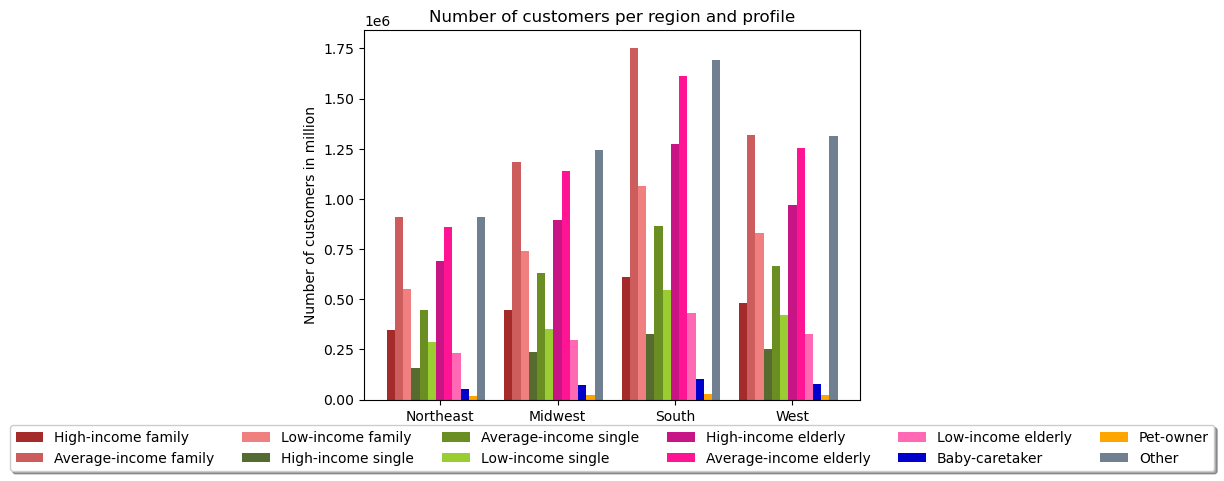

In [53]:
# Geographical distribution of customer profiles
# Setting height of bars
Ohighincfam = [345640, 446553, 608825, 478996]
Pavgincfam = [909265, 1185242, 1754315, 1316074]
Qlowincfam = [551661, 742672, 1063407, 828343]
Rhighincsin = [155619, 238387, 327884, 251398]
Savgincsin = [448226, 631890, 865392, 663301]
Tlowincsin = [287312, 353578, 545495, 421609]
Uhighinceld = [690504, 894619, 1273340, 971377]
Vavginceld = [860195, 1137370, 1613797, 1255153]
Wlowinceld = [233994, 295343, 428827, 326079]
Xbabycaret = [54687, 71033, 104231, 77113]
Ypetown = [17734, 21358, 29909, 24059]
Zother = [909045, 1242261, 1694020, 1312555]

# Setting width of bars
barWidth = 0.07

# Setting position of bars on X axis
br1 = np.arange(len(Ohighincfam))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]
br11 = [x + barWidth for x in br10]
br12 = [x + barWidth for x in br11]

# Make the plot
plt.bar(br1, Ohighincfam, color ='brown', width = barWidth, label ='High-income family')
plt.bar(br2, Pavgincfam, color ='indianred', width = barWidth, label ='Average-income family')
plt.bar(br3, Qlowincfam, color ='lightcoral', width = barWidth, label ='Low-income family')
plt.bar(br4, Rhighincsin, color ='darkolivegreen', width = barWidth, label ='High-income single')
plt.bar(br5, Savgincsin, color ='olivedrab', width = barWidth, label ='Average-income single')
plt.bar(br6, Tlowincsin, color ='yellowgreen', width = barWidth, label ='Low-income single')
plt.bar(br7, Uhighinceld, color ='mediumvioletred', width = barWidth, label ='High-income elderly')
plt.bar(br8, Vavginceld, color ='deeppink', width = barWidth, label ='Average-income elderly')
plt.bar(br9, Wlowinceld, color ='hotpink', width = barWidth, label ='Low-income elderly')
plt.bar(br10, Xbabycaret, color ='mediumblue', width = barWidth, label ='Baby-caretaker')
plt.bar(br11, Ypetown, color ='orange', width = barWidth, label ='Pet-owner')
plt.bar(br12, Zother, color ='slategray', width = barWidth, label ='Other')

# Define axis
ax = plt.subplot(111)

# Adding Xticks
plt.xlabel('Regions')
plt.ylabel('Number of customers in million')
plt.title ('Number of customers per region and profile')
plt.xticks([r + 6*barWidth for r in range(len(Ohighincfam))], ['Northeast', 'Midwest', 'South', 'West'])

# Put legend below axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)
 
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'bar_geo_dist_cust_profiles.png'))
plt.show()

In [54]:
# Crossing customer_profile with order_day_of_the_week
crosstab_custprof_orderdow = pd.crosstab(df_no_pii_reg_act['customer_profile'], df_no_pii_reg_act['order_day_of_the_week'], dropna=False)

In [55]:
# Printing crosstab_custprof_orderdow
crosstab_custprof_orderdow

order_day_of_the_week,0,1,2,3,4,5,6
customer_profile,,,,,,,
average-income elderly,954688,827786,623784,572291,556776,631686,699504
average-income family,1021322,877579,666663,604125,597459,660357,737391
average-income single,518512,454621,331067,305078,299648,335862,364021
baby-caretaker,58466,52713,41437,37833,37391,37408,41816
high-income elderly,753160,656068,489642,453394,448980,487053,541543
high-income family,361654,320291,244106,220305,218413,243727,271518
high-income single,191233,169222,124846,113969,112011,127234,134773
low-income elderly,194818,250778,182587,164239,160061,182073,149687
low-income family,569832,587567,428129,385917,381621,425781,407236


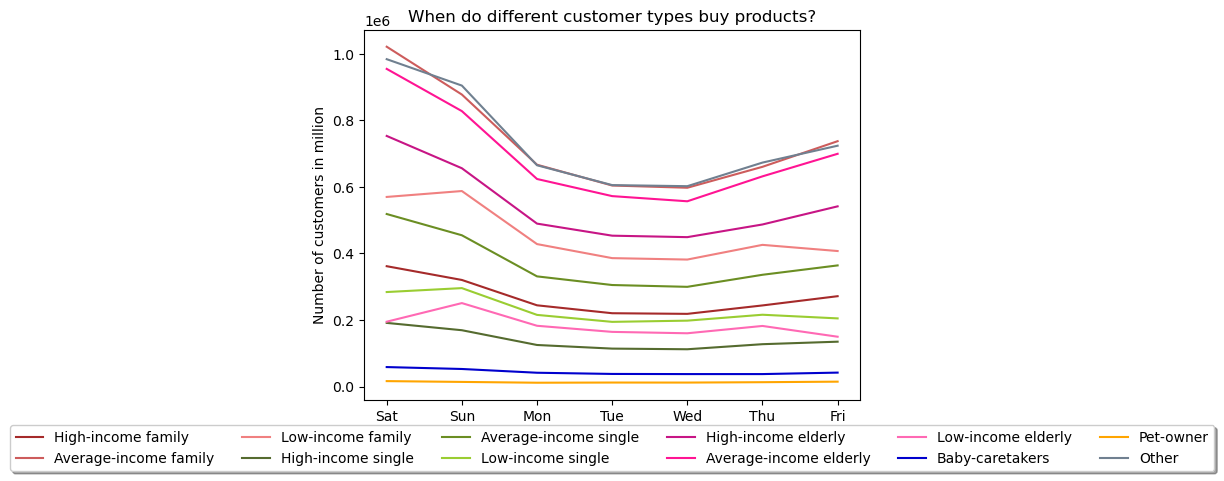

In [56]:
# When do different customer types buy products?
# Line 1 points
x1 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y1 = [361654, 320291, 244106, 220305, 218413, 243727, 271518]

# Plotting line 1 points
plt.plot(x1, y1, label = 'High-income family', color = 'brown')

# Line 2 points
x2 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y2 = [1021322, 877579, 666663, 604125, 597459, 660357, 737391]

# Plotting line 2 points
plt.plot(x2, y2, label = 'Average-income family', color = 'indianred')

# Line 3 points
x3 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y3 = [569832, 587567, 428129, 385917, 381621, 425781, 407236]

# Plotting line 3 points
plt.plot(x3, y3, label = 'Low-income family', color = 'lightcoral')

# Line 4 points
x4 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y4 = [191233, 169222, 124846, 113969, 112011, 127234, 134773]

# Plotting line 4 points
plt.plot(x4, y4, label = 'High-income single', color = 'darkolivegreen')

# Line 5 points
x5 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y5 = [518512, 454621, 331067, 305078, 299648, 335862, 364021]

# Plotting line 5 points
plt.plot(x5, y5, label = 'Average-income single', color = 'olivedrab')

# Line 6 points
x1 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y1 = [283985, 295799, 215308, 194353, 198002, 215765, 204782]

# Plotting line 6 points
plt.plot(x1, y1, label = 'Low-income single', color = 'yellowgreen')

# Line 7 points
x2 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y2 = [753160, 656068, 489642, 453394, 448980, 487053, 541543]

# Plotting line 7 points
plt.plot(x2, y2, label = 'High-income elderly', color = 'mediumvioletred')

# Line 8 points
x3 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y3 = [954688, 827786, 623784, 572291, 556776, 631686, 699504]

# Plotting line 8 points
plt.plot(x3, y3, label = 'Average-income elderly', color = 'deeppink')

# Line 9 points
x4 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y4 = [194818, 250778, 182587, 164239, 160061, 182073, 149687]

# Plotting line 9 points
plt.plot(x4, y4, label = 'Low-income elderly', color = 'hotpink')

# Line 10 points
x5 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y5 = [58466, 52713, 41437, 37833, 37391, 37408, 41816]

# Plotting line 10 points
plt.plot(x5, y5, label = 'Baby-caretakers', color = 'mediumblue')

# Line 11 points
x4 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y4 = [16257, 13851, 11437, 11971, 11889, 13018, 14637]

# Plotting line 11 points
plt.plot(x4, y4, label = 'Pet-owner', color = 'orange')

# Line 12 points
x5 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y5 = [983882, 904529, 665006, 605424, 602143, 673072, 723825]

# Plotting line 12 points
plt.plot(x5, y5, label = 'Other', color = 'slategray')

# Define axis
ax = plt.subplot(111)

# Set the x-axis label
plt.xlabel('Days of the week')
# Set the y-axis label
plt.ylabel ('Number of customers in million')
# Set the title
plt.title('When do different customer types buy products?')
# Put legend below axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)
# Save visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'line_when_cust_buy.png'))
# Display visual
plt.show()

# 09 Aggregation of minimum, mean and maximum usage frequency and expenditure for customer profiles

In [57]:
# Mimimun, mean and maximum usage frequency per customer profile
df_no_pii_reg_act.groupby('customer_profile').agg({'days_since_prior_order': ['min', 'mean', 'max']})

days_since_prior_order                 
                                          min       mean   max
customer_profile                                              
average-income elderly                    0.0  10.196148  30.0
average-income family                     0.0  10.234717  30.0
average-income single                     0.0  10.213578  30.0
baby-caretaker                            0.0   9.298664  30.0
high-income elderly                       0.0  10.136714  30.0
high-income family                        0.0  10.291474  30.0
high-income single                        0.0  10.117779  30.0
low-income elderly                        0.0  10.539501  30.0
low-income family                         0.0  10.317167  30.0
low-income single                         0.0  10.332111  30.0
other                                     0.0  10.214664  30.0
pet-owner                                 0.0  10.938857  30.0

In [58]:
# Minimum, mean and maximum expenditure per customer profile
df_no_pii_reg_act.groupby('customer_profile').agg({'prices': ['min', 'mean', 'max']})

prices                
                          min      mean   max
customer_profile                             
average-income elderly    1.0  7.958822  25.0
average-income family     1.0  7.960171  25.0
average-income single     1.0  7.954826  25.0
baby-caretaker            1.0  7.647681  15.0
high-income elderly       1.0  7.956172  25.0
high-income family        1.0  7.962082  25.0
high-income single        1.0  7.935426  25.0
low-income elderly        1.0  6.711820  25.0
low-income family         1.0  7.410511  25.0
low-income single         1.0  7.415245  25.0
other                     1.0  7.793349  25.0
pet-owner                 1.0  7.887489  15.0

# 10 Comparison of customer profiles with regions and departments

In [59]:
# Crossing customer_profile with department_id
crosstab_custprof_deps = pd.crosstab(df_no_pii_reg_act['customer_profile'], df_no_pii_reg_act['department'], dropna=False)

In [60]:
# Printing crosstab_custprof_deps
crosstab_custprof_deps

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,
average-income elderly,20671,17446,180097,384340,100747,5215,167300,835951,162328,137165,342594,107655,41901,117790,15428,290190,65163,0,1486836,387698
average-income family,23995,0,191094,411311,109940,5501,177404,893274,170504,146203,363896,116450,44659,123695,17109,307552,72577,0,1581721,408011
average-income single,11338,38852,96958,205945,53988,2702,88204,444315,85629,71815,180596,55355,22922,60263,8368,151945,35402,0,792066,202146
baby-caretaker,0,307064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
high-income elderly,18174,13273,145285,312171,81798,3883,131596,656729,127005,105803,271526,88118,32509,91325,12472,227698,53432,0,1155184,301859
high-income family,11118,0,72432,151716,39765,1827,67150,322080,61780,53556,133322,44450,16599,46128,6165,113998,26449,0,564632,146847
high-income single,6290,13536,36867,78450,20644,923,33707,165736,31659,26719,67471,22755,8126,22493,3307,58159,13051,0,287178,76217
low-income elderly,6783,2464,40635,148176,34994,1831,30589,193661,39634,24684,83246,34206,8168,13320,3890,64058,18751,0,324377,210776
low-income family,14455,0,112321,299090,76519,4022,95632,517181,104455,77621,216804,75324,24266,57756,10214,175655,44466,0,900954,379348


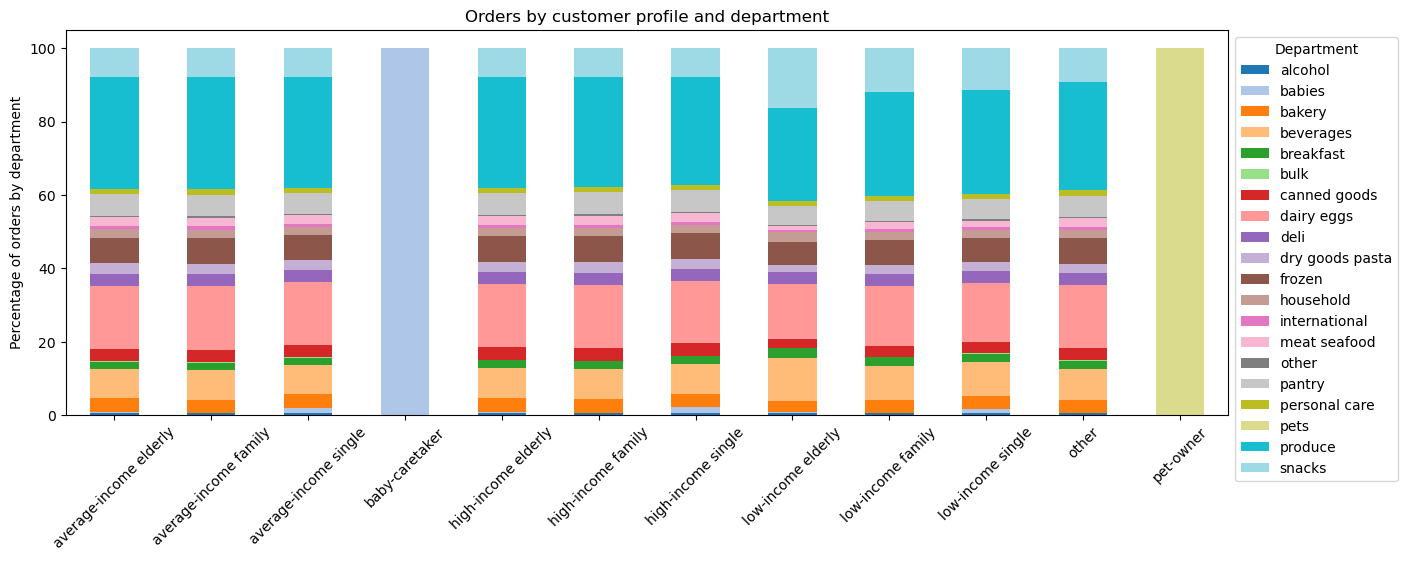

In [62]:
# Creation of a stacked barchart of customer profiles by department
bar_custprofile_department = crosstab_custprof_deps.loc[:,['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'other', 'pantry', 'personal care', 'pets', 'produce', 'snacks']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap = 'tab20').legend(title='Department', bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Percentage of orders by department')
plt.title ('Orders by customer profile and department')
# Save visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'stackedbar_custprof_deps.png'))

In [63]:
# Crossing customer_profile with region_flag
crosstab_custprof_region = pd.crosstab(df_no_pii_reg_act['customer_profile'], df_no_pii_reg_act['region_flag'], dropna=False)

In [64]:
# Printing crosstab_custprof_region
crosstab_custprof_region

region_flag,Midwest,Northeast,South,West
customer_profile,,,,
average-income elderly,1137370,860195,1613797,1255153
average-income family,1185242,909265,1754315,1316074
average-income single,631890,448226,865392,663301
baby-caretaker,71033,54687,104231,77113
high-income elderly,894619,690504,1273340,971377
high-income family,446553,345640,608825,478996
high-income single,238387,155619,327884,251398
low-income elderly,295343,233994,428827,326079
low-income family,742672,551661,1063407,828343


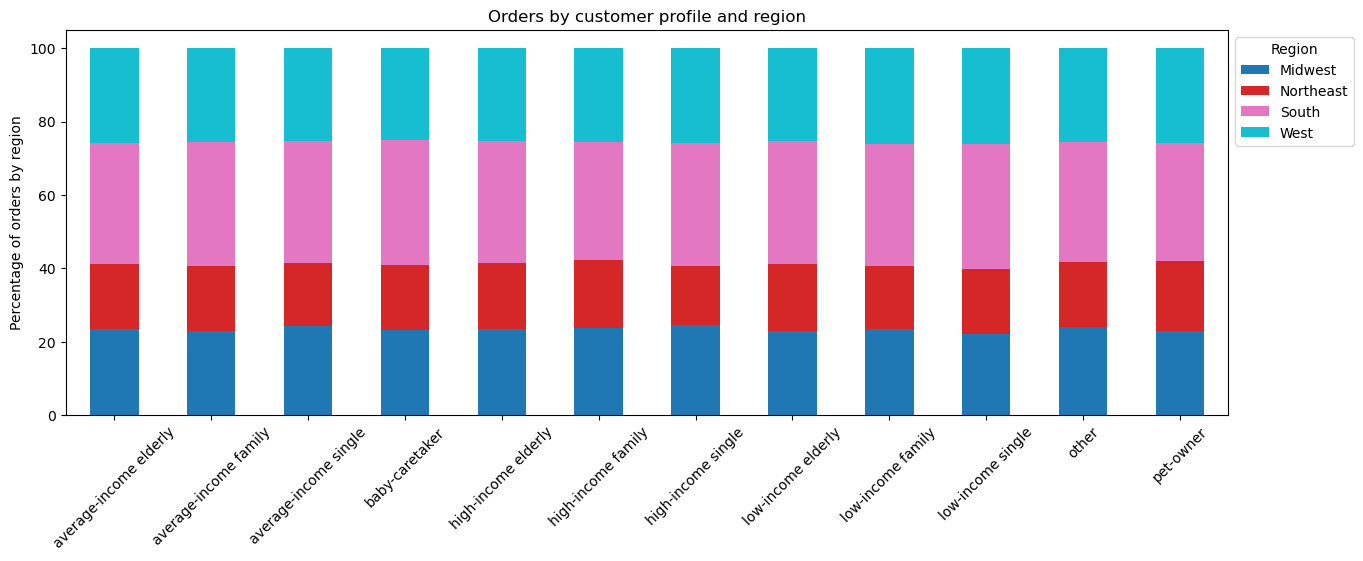

In [65]:
# Creation of a stacked barchart of customer profile by region
bar_custprofile_region = crosstab_custprof_region.loc[:,['Midwest', 'Northeast', 'South', 'West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap = 'tab10').legend(title='Region', bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Percentage of orders by region')
plt.title ('Orders by customer profile and region')
# Saving visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'stackedbar_custprof_regions.png'))

# 11 Answering questions for final report and creating more visualisations

## 11.1 Listing columns derived throughout analysis in final report

In [66]:
# Top rows of df_no_pii_reg_act
df_no_pii_reg_act.head()

,department_id,department,product_id,product_name,aisle_id,prices,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,maximum_orders,loyalty_flag,average_price_for_user,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,region_flag,Low_activity_flag,customer_profile
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,10.5,2563211,1677,1,5,13,0.0,9,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West,Regular activity,average-income family
1,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2135223,1677,18,4,22,4.0,10,0,Low-range product,Least busy,Least busy two days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West,Regular activity,average-income family
2,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2660694,1677,19,6,13,16.0,15,1,Low-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West,Regular activity,average-income family
3,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,1050238,1677,14,6,0,10.0,16,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West,Regular activity,average-income family
4,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,2149917,1677,16,5,18,11.0,9,1,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Male,Utah,57,2,married,101071,West,Regular activity,average-income family


## 11.2 Re-creating bar chart for busiest day of the week

In [67]:
# Counting orders per day of week
df['order_day_of_the_week'].value_counts(dropna=False)

0    6203329
1    5659298
6    4495887
2    4213105
5    4205076
3    3839865
4    3783172
Name: order_day_of_the_week, dtype: int64

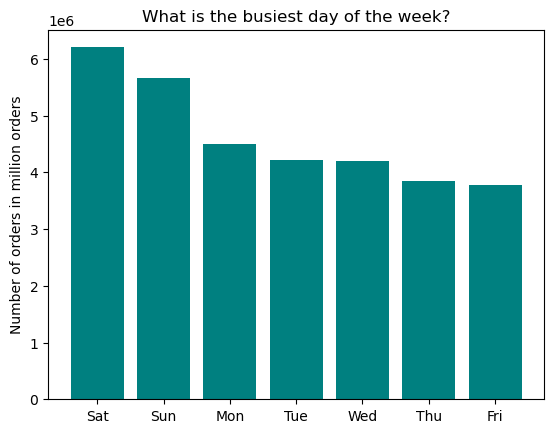

<Figure size 640x480 with 0 Axes>

In [68]:
# Defining heights and bars
height = [6203329, 5659298, 4495887, 4213105, 4205076, 3839865, 3783172]
bars = ('Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri')
x_pos = np.arange(len(bars))

# Create bars and choose color
plt.bar(x_pos, height, color = 'teal')

# Adding title and y-axis name
plt.title('What is the busiest day of the week?')
plt.ylabel('Number of orders in million orders')

# Creating names on the x-axis
plt.xticks(x_pos, bars)

# Showing chart
plt.show()

# Saving visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'bar_business_over_week.png'))

## 11.3 Re-creating histogram for busiest hour of the day

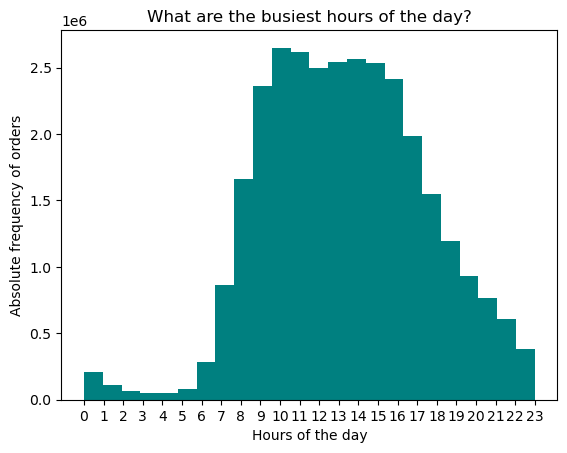

In [69]:
# Creating histogram
df_no_pii_reg_act['order_hour_of_day'].plot.hist(bins=24, color='teal')

# Adding labels   
plt.xlabel('Hours of the day')
plt.ylabel('Absolute frequency of orders')
plt.xticks(np.arange(0, 24, 1))
plt.title('What are the busiest hours of the day?')

# Saving visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'bar_business_over_day.png'))

## 11.4 Re-creating line chart to show when people spend most money

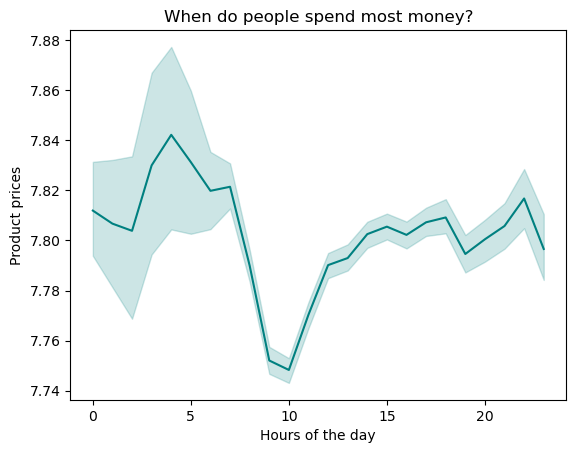

In [70]:
# Creating line chart
sns.lineplot(data=df_no_pii_reg_act, x='order_hour_of_day', y='prices', color='teal')

# Adding labels   
plt.xlabel('Hours of the day')
plt.ylabel('Product prices')
plt.title('When do people spend most money?')

# Saving visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'line_prices_over_day.png'))

## 11.5 Grouping product orders into price ranges

In [71]:
# Counting number of labels in price_range_loc
df_no_pii_reg_act['price_range_loc'].value_counts(dropna=False)

Mid-range product     20891771
Low-range product      9674840
High-range product      393076
Name: price_range_loc, dtype: int64

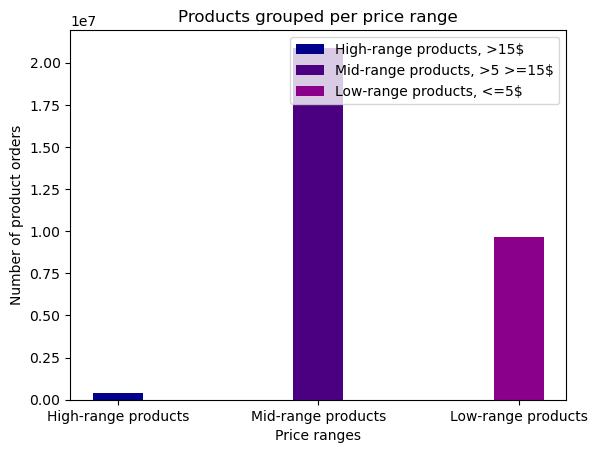

<Figure size 640x480 with 0 Axes>

In [72]:
# Creating bar chart for number of products per range label
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [393076, 20891771, 9674840]
bar1 = plt.bar(ind, xvals, width, color = ['darkblue', 'indigo', 'darkmagenta'])

  
plt.xlabel('Price ranges')
plt.ylabel('Number of product orders')
plt.title('Products grouped per price range')
  
plt.xticks(ind,['High-range products', 'Mid-range products', 'Low-range products'])
plt.legend((bar1), ('High-range products, >15$', 'Mid-range products, >5 >=15$', 'Low-range products, <=5$') )
plt.show()

# Save visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'bar_price_range.png'))

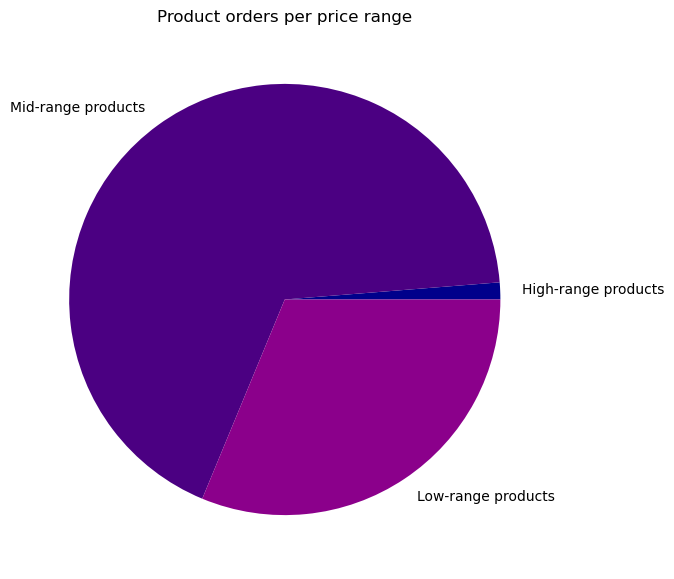

<Figure size 640x480 with 0 Axes>

In [73]:
# Creating a pie chart instead, dataset:
ranges  = ['High-range products', 'Mid-range products', 'Low-range products']
pie_data = [393076, 20891771, 9674840]
 
# List for colors 
colors = ['darkblue', 'indigo', 'darkmagenta']

# Creating the plot
fig = plt.figure(figsize =(10, 7))
plt.pie(pie_data, labels = ranges, colors = colors)

# Assigning a title
plt.title('Product orders per price range')

# Showing the plot
plt.show()

# Saving visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'pie_price_range.png'))

## 11.6 Visualising popularity of departments (frequency of product orders)

In [74]:
# Which departments have the highest frequency of orders?
df_no_pii_reg_act['department'].value_counts()

produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
other                99179
pets                 93060
bulk                 33451
Name: department, dtype: int64

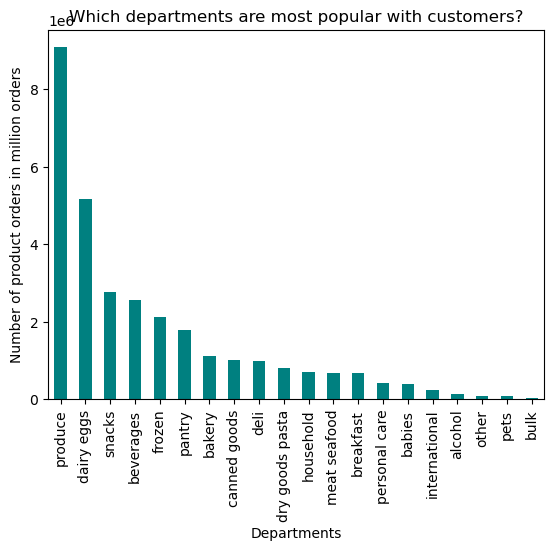

In [75]:
# Creating bar chart
df_no_pii_reg_act['department'].value_counts().plot.bar(color='teal')

# Adding labels   
plt.xlabel('Departments')
plt.ylabel('Number of product orders in million orders')
plt.title('Which departments are most popular with customers?')

# Saving visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'deps_popularity.png'))

## 11.7 Visualising customer brand loyalty

In [76]:
# Counting values per loyalty category
df_no_pii_reg_act['loyalty_flag'].value_counts(dropna=False)

Regular customer    15874128
Loyal customer      10282763
New customer         4802796
Name: loyalty_flag, dtype: int64

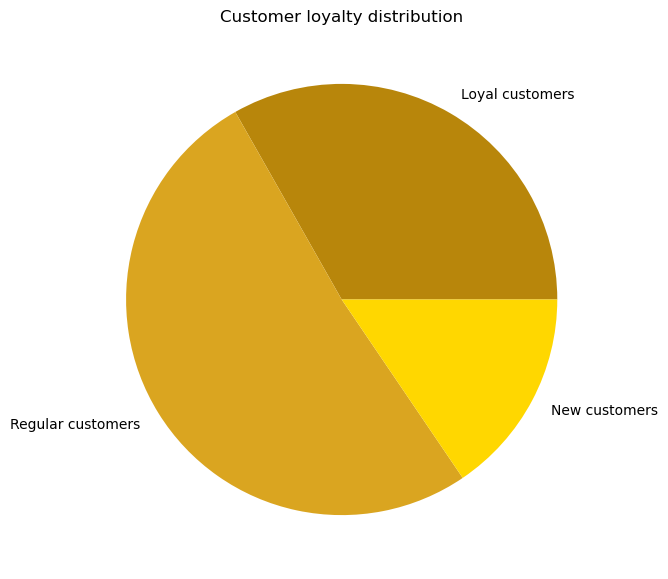

<Figure size 640x480 with 0 Axes>

In [77]:
# Creating a pie chart for customer loyalty
categories  = ['Loyal customers', 'Regular customers', 'New customers']
pie_segments = [10282763, 15874128, 4802796]
 
# List for colors 
colors = ['darkgoldenrod', 'goldenrod', 'gold']

# Creating the plot
fig = plt.figure(figsize =(10, 7))
plt.pie(pie_segments, labels = categories, colors = colors)

# Assigning a title
plt.title('Customer loyalty distribution')

# Showing the plot
plt.show()

# Saving visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'pie_loyalty.png'))

## 11.8 Checking for differences in ordering habits based on customers' loyalty status

In [78]:
# Checking basic descriptive statistics
df_no_pii_reg_act.groupby('loyalty_flag').agg({'prices': ['min', 'mean', 'max'], 'age': ['min', 'mean', 'max'], 'n_dependants': ['min', 'mean', 'max'], 'income': ['min', 'mean', 'max']})

prices                 age                n_dependants  \
                    min      mean   max min       mean max          min   
loyalty_flag                                                              
Loyal customer      1.0  7.773575  25.0  18  49.537880  81            0   
New customer        1.0  7.801665  25.0  18  49.525398  81            0   
Regular customer    1.0  7.798262  25.0  18  49.405430  81            0   

                               income                         
                      mean max    min           mean     max  
loyalty_flag                                                  
Loyal customer    1.498839   3  25955  100336.861552  593901  
New customer      1.497086   3  25903   97395.440049  590790  
Regular customer  1.505173   3  25972   99896.995585  592409

## 11.9 Visualising ordering habits depending on loyalty status

In [79]:
# Crossing order_hour_of_day and loyalty_flag
crosstab_orderhour_loyalty = pd.crosstab(df_no_pii_reg_act['loyalty_flag'], df_no_pii_reg_act['order_hour_of_day'], dropna=False)

In [80]:
# Printing crosstab_orderhour_loyalty
crosstab_orderhour_loyalty

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
loyalty_flag,,,,,,,,,,,,,,,,,,,,,,,,
Loyal customer,61741,30177,17784,13373,16877,29345,112845,346651,643813,882645,937543,872900,806910,824375,835070,809662,743659,584512,449269,360227,309232,264503,206126,123524
New customer,35307,20671,12241,9509,8439,12470,33894,102150,208086,313078,382348,402613,394522,409761,409862,414225,403646,343451,270552,204743,147310,112570,91476,59872
Regular customer,110968,58757,35652,25902,25437,42586,134231,414285,806967,1167544,1329446,1338937,1293956,1304777,1322585,1311675,1265939,1054030,831093,628691,474220,385936,309395,201119


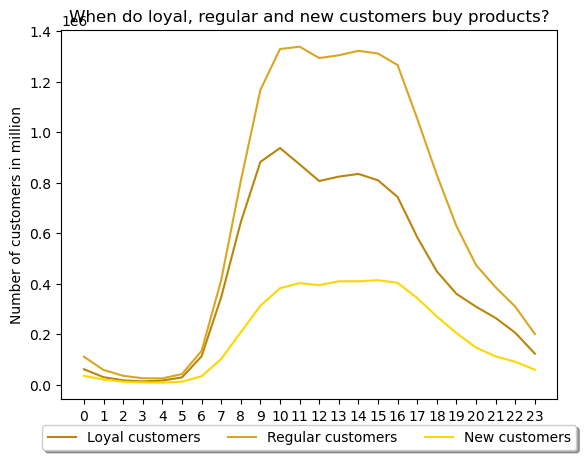

In [81]:
# When do loyal, regular and new customers buy products?
# Line 1 points
x1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
y1 = [61741, 30177, 17784, 13373, 16877, 29345, 112845, 346651, 643813, 882645, 937543, 872900, 806910, 824375, 835070, 809662, 743659, 584512, 449269, 360227, 309232, 264503, 206126, 123524]

# Plotting line 1 points
plt.plot(x1, y1, label = 'Loyal customers', color = 'darkgoldenrod')

# Line 2 points
x2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
y2 = [110968, 58757, 35652, 25902, 25437, 42586, 134231, 414285, 806967, 1167544, 1329446, 1338937, 1293956, 1304777, 1322585, 1311675, 1265939, 1054030, 831093, 628691, 474220, 385936, 309395, 201119]

# Plotting line 2 points
plt.plot(x2, y2, label = 'Regular customers', color = 'goldenrod')

# Line 3 points
x3 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
y3 = [35307, 20671, 12241, 9509, 8439, 12470, 33894, 102150, 208086, 313078, 382348, 402613, 394522, 409761, 409862, 414225, 403646, 343451, 270552, 204743, 147310, 112570, 91476, 59872]

# Plotting line 3 points
plt.plot(x3, y3, label = 'New customers', color = 'gold')

# Define axis
ax = plt.subplot(111)

# Set the x-axis label
plt.xlabel('Hours of the day')
# Set the y-axis label
plt.ylabel ('Number of customers in million')
# Set ticks on x-axis
plt.xticks(np.arange(0, 24, 1))
# Set the title
plt.title('When do loyal, regular and new customers buy products?')
# Put legend below axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)
# Save visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'line_when_cust_buy_dep_loyalty.png'))
# Display visual
plt.show()

In [82]:
# Crossing order_day_of_the_week and loyalty_flag
crosstab_orderdow_loyalty = pd.crosstab(df_no_pii_reg_act['loyalty_flag'], df_no_pii_reg_act['order_day_of_the_week'], dropna=False)

In [83]:
# Printing crosstab_orderdow_loyalty
crosstab_orderdow_loyalty

order_day_of_the_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal customer,1754530,1843145,1352144,1266321,1291859,1456509,1318255
New customer,984711,818751,625167,560306,535831,587596,690434
Regular customer,3168568,2748908,2046701,1842272,1796704,1988931,2282044


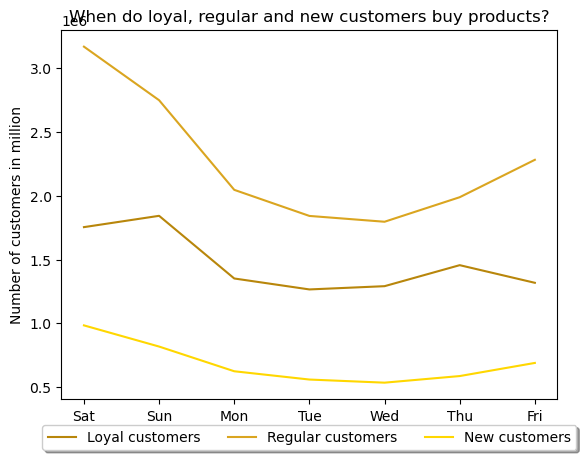

In [84]:
# When do loyal, regular and new customers buy products?
# Line 1 points
x1 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y1 = [1754530, 1843145, 1352144, 1266321, 1291859, 1456509, 1318255]

# Plotting line 1 points
plt.plot(x1, y1, label = 'Loyal customers', color = 'darkgoldenrod')

# Line 2 points
x2 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y2 = [3168568, 2748908, 2046701, 1842272, 1796704, 1988931, 2282044]

# Plotting line 2 points
plt.plot(x2, y2, label = 'Regular customers', color = 'goldenrod')

# Line 3 points
x3 = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y3 = [984711, 818751, 625167, 560306, 535831, 587596, 690434]

# Plotting line 3 points
plt.plot(x3, y3, label = 'New customers', color = 'gold')

# Define axis
ax = plt.subplot(111)

# Set the x-axis label
plt.xlabel('Days of the week')
# Set the y-axis label
plt.ylabel ('Number of customers in million')

# Set the title
plt.title('When do loyal, regular and new customers buy products?')
# Put legend below axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)
# Save visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'line_when_cust_buy_dep_loyalty_days.png'))
# Display visual
plt.show()

In [85]:
# Crossing departments and status
crosstab_deps_loyalty = pd.crosstab(df_no_pii_reg_act['department'], df_no_pii_reg_act['loyalty_flag'], dropna=False)

In [86]:
# Printing crosstab_deps_loyalty
crosstab_deps_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1829377,749157,2593771
deli,324046,158335,521453


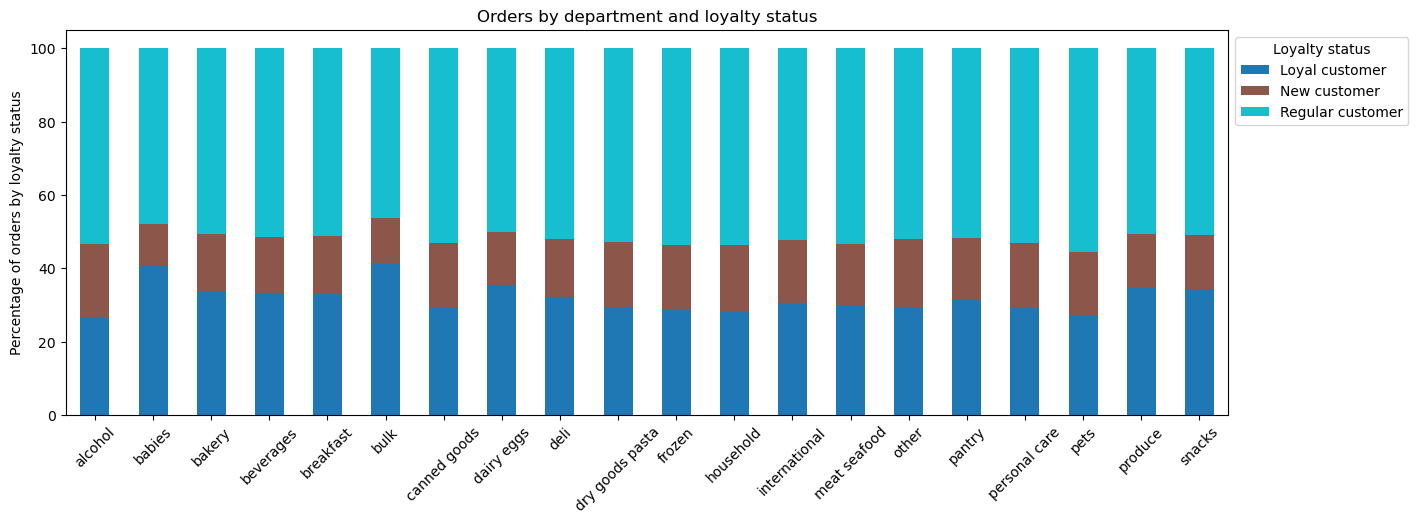

In [87]:
# Creation of a stacked barchart of loyalty status by department
bar_loyalty_deps = crosstab_deps_loyalty.loc[:,['Loyal customer', 'New customer', 'Regular customer']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap = 'tab10').legend(title='Loyalty status', bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Percentage of orders by loyalty status')
plt.title ('Orders by department and loyalty status')
# Saving visual
plt.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'stackedbar_loyalty_deps.png'))

## 11.10 Checking revnue created from price ranges

In [88]:
# Aggregating by price_range_loc and summing up prices
df_no_pii_reg_act.groupby('price_range_loc').agg({'prices': 'sum'})

,prices
price_range_loc,
High-range product,8102771.4
Low-range product,29255100.1
Mid-range product,203836364.1


# 12 Exporting dataframes

In [89]:
# Exporting full dataframe and samples
df_no_pii.to_pickle(os.path.join(path, '02 Data', '02 Prepared data', '2023-02-18_ords_prods_cust_deps_no_pii.pkl'))
df_no_pii_low_act.to_pickle(os.path.join(path, '02 Data', '02 Prepared data', '2023-02-18_ords_prods_cust_deps_no_pii_low_act.pkl'))
df_no_pii_reg_act.to_pickle(os.path.join(path, '02 Data', '02 Prepared data', '2023-02-18_ords_prods_cust_deps_no_pii_reg_act.pkl'))